# Analyze Source Collection and Target File

In this notebook we will:
- Analyze our custom source sound collection by extracting features from each sound file.
- Analyze a target audio file that will later be reconstructed using sound chunks from the source collection.
- Experiment with different frame sizes to see their impact on the analysis.

The audio analysis is performed using our modular function `analyze_sound` (from `src/analysis.py`), which uses Essentia to compute features like loudness and MFCCs.


## Environment Setup and Imports

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Audio
import sys
sys.path.append(os.path.abspath(".."))

# Import our analysis function from the module
from src.analysis import analyze_sound

# (Optionally) import config if you want to refer to default paths
from src import config

# Define file paths used in this notebook (you can change these as needed)
# Source collection metadata CSV generated from the previous notebook
SOURCE_METADATA_FILE = '../data/metadata/fonts_collection.csv'
# Where to store analysis results for the source collection:
SOURCE_ANALYSIS_FILE = '../data/metadata/source_analysis.csv'
# Where to store analysis results for the target file:
TARGET_ANALYSIS_FILE = '../data/metadata/target_analysis.csv'


[   INFO   ] MusicExtractorSVM: no classifier models were configured by default


## Analyze the Source Collection

This cell loads our previously generated source collection metadata, then iterates over each sound file to analyze it using analyze_sound with a specified frame size (here set to 8192 samples). The results (which include features like loudness and MFCC coefficients) are accumulated into a DataFrame and saved to a CSV file. We can experiment with the frame_size_source value to see how different chunk lengths affect the analysis.

In [3]:
# Load the metadata DataFrame of our source collection
df_source_metadata = pd.read_csv(SOURCE_METADATA_FILE)
print(f"Loaded source metadata with {len(df_source_metadata)} entries.")

# List to accumulate analysis results from each sound file
source_analysis_results = []

# Experiment with a frame size (in samples); try adjusting this value (e.g., 4096, 8192, etc.)
frame_size_source = 8192

# Loop over each sound in our source collection and analyze it
for i, row in df_source_metadata.iterrows():
    print(f"Analyzing source sound with Freesound ID {row['freesound_id']} [{i+1}/{len(df_source_metadata)}]")
    try:
        # Analyze the sound file. Note that we pass frame_size_source and the sound's ID.
        analysis_output = analyze_sound(row['path'], frame_size=frame_size_source, audio_id=row['freesound_id'])
        source_analysis_results.extend(analysis_output)
    except Exception as e:
        print(f"Error analyzing sound {row['freesound_id']}: {e}")

# Convert the analysis results into a DataFrame and save it
df_source_analysis = pd.DataFrame(source_analysis_results)
df_source_analysis.to_csv(SOURCE_ANALYSIS_FILE, index=False)
print(f"Saved source analysis with {len(df_source_analysis)} frames to {SOURCE_ANALYSIS_FILE}")

# Display a preview and summary statistics
display(df_source_analysis.head())
display(df_source_analysis.describe())


Loaded source metadata with 45 entries.
Analyzing source sound with Freesound ID 86351 [1/45]
Analyzing source sound with Freesound ID 695793 [2/45]
Analyzing source sound with Freesound ID 486267 [3/45]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 334148 [4/45]
Analyzing source sound with Freesound ID 277749 [5/45]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 50053 [6/45]
Analyzing source sound with Freesound ID 337791 [7/45]


ank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter 

Analyzing source sound with Freesound ID 34066 [8/45]
Analyzing source sound with Freesound ID 787958 [9/45]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 251631 [10/45]
Analyzing source sound with Freesound ID 387064 [11/45]
Analyzing source sound with Freesound ID 464283 [12/45]


nk.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter b

Analyzing source sound with Freesound ID 513394 [13/45]
Analyzing source sound with Freesound ID 435665 [14/45]


k.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter ba

Analyzing source sound with Freesound ID 316895 [15/45]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 662090 [16/45]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 464477 [17/45]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 619325 [18/45]
Analyzing source sound with Freesound ID 560287 [19/45]


k.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter ba

Analyzing source sound with Freesound ID 642763 [20/45]
Analyzing source sound with Freesound ID 632754 [21/45]



[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank

Analyzing source sound with Freesound ID 698356 [22/45]
Analyzing source sound with Freesound ID 632346 [23/45]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 634226 [24/45]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 410526 [25/45]


k.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter ba

Analyzing source sound with Freesound ID 348830 [26/45]
Analyzing source sound with Freesound ID 509176 [27/45]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 528353 [28/45]
Analyzing source sound with Freesound ID 405139 [29/45]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 554702 [30/45]
Analyzing source sound with Freesound ID 138988 [31/45]


nk.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter b

Analyzing source sound with Freesound ID 379470 [32/45]
Analyzing source sound with Freesound ID 726315 [33/45]
Analyzing source sound with Freesound ID 438887 [34/45]


.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter ban

Analyzing source sound with Freesound ID 640631 [35/45]
Analyzing source sound with Freesound ID 420295 [36/45]
Analyzing source sound with Freesound ID 770280 [37/45]


nk.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter b

Analyzing source sound with Freesound ID 481145 [38/45]
Analyzing source sound with Freesound ID 9666 [39/45]
Analyzing source sound with Freesound ID 259239 [40/45]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 463868 [41/45]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 29530 [42/45]


.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter ban

Analyzing source sound with Freesound ID 182278 [43/45]
Analyzing source sound with Freesound ID 675707 [44/45]


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Analyzing source sound with Freesound ID 751234 [45/45]
Saved source analysis with 3384 frames to ../data/metadata/source_analysis.csv


[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (4097) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

,freesound_id,id,path,start_sample,end_sample,loudness,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12
0,86351,86351_f0,../data/raw/86351_14771-hq.ogg,0,8192,0.000006,-1104.972412,62.011765,7.115780,27.169132,3.216209,2.697144,1.896954,3.636337,-6.085785,2.942387,-4.235641,3.542458,-2.502010
1,86351,86351_f1,../data/raw/86351_14771-hq.ogg,8192,16384,0.000041,-984.184937,-3.074173,5.537285,18.952084,-5.581154,-5.169594,-1.885185,4.223680,-2.494556,1.209351,-7.282253,9.452629,4.570793
2,86351,86351_f2,../data/raw/86351_14771-hq.ogg,16384,24576,0.000107,-900.798889,-31.552231,-7.938501,21.736094,-6.129955,-0.707634,-5.293806,5.148294,-2.516766,5.881105,-1.846996,-0.950447,8.634378
3,86351,86351_f3,../data/raw/86351_14771-hq.ogg,24576,32768,0.000118,-872.842102,-33.241478,-17.353855,20.082907,-6.451366,-3.666487,-7.914553,-3.617420,-12.127304,-1.301680,-3.062157,-2.000185,2.215147
4,86351,86351_f4,../data/raw/86351_14771-hq.ogg,32768,40960,0.000116,-888.175293,-15.954029,-7.202486,13.515503,-5.250751,-4.589025,-4.897903,-12.251749,-14.142746,4.373043,1.349991,-3.882265,1.688210


,freesound_id,start_sample,end_sample,loudness,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12
count,3384.000000,3.384000e+03,3.384000e+03,3.384000e+03,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000
mean,468765.822400,3.728691e+05,3.810611e+05,6.413284e-04,-902.598389,108.434807,3.618426,26.995226,-6.850501,6.879949,6.246514,6.989814,3.842321,5.050554,1.764144,3.421109,2.392358
std,194574.552709,2.749441e+05,2.749441e+05,1.391870e-03,110.196167,60.809948,34.791885,33.666157,20.960836,17.534454,14.343123,12.809872,12.057019,11.384588,9.794825,9.854555,9.345737
min,9666.000000,0.000000e+00,8.192000e+03,7.891306e-07,-1256.992554,-68.286400,-105.446838,-74.791656,-79.908699,-55.276112,-52.767365,-33.766270,-36.744698,-52.078602,-34.920811,-27.780983,-24.447306
25%,348830.000000,1.474560e+05,1.556480e+05,8.739398e-05,-977.133392,69.146761,-18.488399,6.948364,-19.300397,-3.751550,-3.037461,-1.529633,-3.624746,-1.639883,-3.652983,-2.717686,-3.146526
50%,464477.000000,3.194880e+05,3.276800e+05,1.814052e-04,-917.379089,110.895744,0.412008,25.872145,-7.536223,6.799465,5.979149,6.013660,3.652384,4.247589,1.521910,2.126265,1.811626
75%,632754.000000,5.406720e+05,5.488640e+05,4.929852e-04,-848.688416,142.757671,26.866194,46.681593,8.929944,17.510321,15.301677,14.534138,10.293670,10.722672,7.025948,8.636086,6.882241
max,787958.000000,1.187840e+06,1.196032e+06,1.760687e-02,-601.936768,305.079742,111.076614,141.902649,66.763771,84.027344,60.449986,73.915756,55.678783,62.751862,43.024632,49.240273,62.469688


## Analyze the Target File 

This cell analyzes a target audio file (set by TARGET_SOUND_PATH) using our analyze_sound function with a specified frame size (here 4096 samples). It saves the results to a CSV file, then plots the waveform of the target audio with vertical lines indicating the frame start points. You can experiment with both different frame sizes and the sync_with_beats flag to see how segmentation changes.

Analyzing target sound: ../data/raw/464477_1648170-hq.ogg


[   INFO   ] TriangularBands: input spectrum size (2049) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (2049) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (2049) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (2049) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (2049) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (2049) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] TriangularBands: input spectrum size (2049) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.

Saved target analysis with 241 frames to ../data/metadata/target_analysis.csv


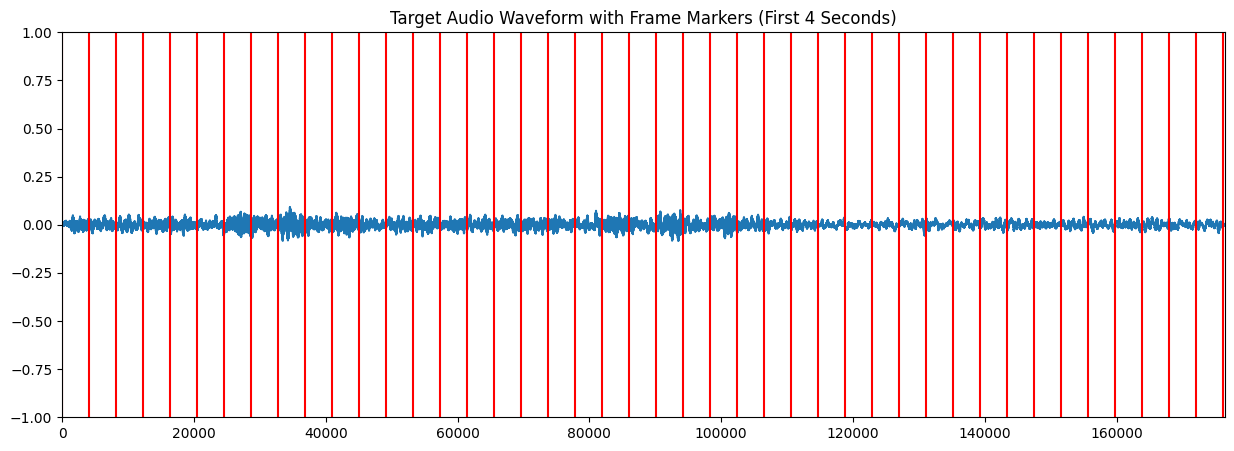

,freesound_id,id,path,start_sample,end_sample,loudness,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12
0,None,None_f0,../data/raw/464477_1648170-hq.ogg,0,4096,0.000187,-927.097778,51.054630,89.418213,82.481880,-38.867992,46.069778,-8.719563,38.107788,-21.170244,30.425533,-1.974232,6.690216,13.348789
1,None,None_f1,../data/raw/464477_1648170-hq.ogg,4096,8192,0.000246,-920.596130,52.438751,61.350449,82.127892,-24.604679,51.694748,-4.755402,29.719625,4.706665,19.740484,7.739590,24.014381,4.262794
2,None,None_f2,../data/raw/464477_1648170-hq.ogg,8192,12288,0.000330,-918.257935,61.429775,42.393440,112.446869,-27.178383,34.824581,15.457474,18.637342,7.770462,13.370886,9.047184,15.472744,8.533936
3,None,None_f3,../data/raw/464477_1648170-hq.ogg,12288,16384,0.000263,-924.525085,75.303909,44.021111,105.022392,-30.504272,41.717972,15.411320,15.512449,21.528290,-0.178291,2.443832,13.305607,-2.296932
4,None,None_f4,../data/raw/464477_1648170-hq.ogg,16384,20480,0.000235,-903.743347,54.329212,44.197880,98.925385,-36.566505,47.324432,7.831528,10.167858,16.748360,-2.188568,17.704948,10.304592,0.614487


,start_sample,end_sample,loudness,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,491520.000000,495616.000000,0.000227,-973.452148,104.635162,50.031990,72.932930,-20.147083,31.341490,10.987520,18.776850,11.940866,10.488044,11.262158,7.486937,9.642647
std,285552.212323,285552.212323,0.000059,26.384121,21.022543,16.492414,14.189737,12.538935,17.938578,14.621233,14.408009,12.489108,11.738091,10.231416,9.075701,8.976598
min,0.000000,4096.000000,0.000109,-1015.519470,32.052864,3.677990,38.130196,-50.851608,-10.617603,-38.147713,-15.739502,-38.781532,-24.046776,-20.589375,-24.601192,-17.518938
25%,245760.000000,249856.000000,0.000188,-994.146423,94.216965,39.917747,62.935638,-29.005074,19.218731,3.265137,8.210333,4.351398,3.123856,4.246590,2.232803,4.333611
50%,491520.000000,495616.000000,0.000217,-977.885376,107.960632,50.348331,71.925461,-20.493885,31.564159,13.113121,15.914614,12.477074,10.270361,10.229408,7.834648,10.276653
75%,737280.000000,741376.000000,0.000252,-959.957092,118.815903,61.851379,82.840775,-12.049290,43.453239,20.223412,29.033596,19.717365,17.931257,17.750191,13.427010,14.685875
max,983040.000000,987136.000000,0.000524,-901.759094,147.877441,89.418213,112.446869,22.765697,81.991425,43.494087,72.958588,42.664616,48.392292,43.538113,27.061144,35.044083


In [6]:
# Target file to analyze (change this to try different target files)
TARGET_SOUND_PATH = '../data/raw/464477_1648170-hq.ogg'

# Analyze the target audio file. You can try different target files by changing TARGET_SOUND_PATH.
print(f"Analyzing target sound: {TARGET_SOUND_PATH}")

# Experiment with a different frame size for the target file if desired (e.g., 4096 samples)
frame_size_target = 4096

# Analyze the target sound file; optionally, set sync_with_beats=True to test beat-synchronized segmentation.
target_analysis = analyze_sound(TARGET_SOUND_PATH, frame_size=frame_size_target, sync_with_beats=False)

# Convert target analysis results into a DataFrame and save it
df_target_analysis = pd.DataFrame(target_analysis)
df_target_analysis.to_csv(TARGET_ANALYSIS_FILE, index=False)
print(f"Saved target analysis with {len(df_target_analysis)} frames to {TARGET_ANALYSIS_FILE}")

# Plot the waveform of the target file with segmentation markers
import essentia.standard as estd
loader = estd.MonoLoader(filename=TARGET_SOUND_PATH)
audio = loader()
plt.figure(figsize=(15,5))
plt.plot(audio)
plt.vlines(df_target_analysis['start_sample'].values, -1, 1, color='red')
plt.axis([0, min(len(audio), 44100*4), -1, 1])
plt.title('Target Audio Waveform with Frame Markers (First 4 Seconds)')
plt.show()

# Display a preview and summary statistics of the target analysis DataFrame
display(df_target_analysis.head())
display(df_target_analysis.describe())
